## Creating simple PD controller and check convergence

In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from robot_model import *

In [22]:
robot = CDPR4(pos=np.array([0,0,1])) # 1 m above the ground
desired_p = np.array([1,1,2]) # desired point is 2 m above the ground
desired_v = np.array([0,0,0])
robot.Kp = 100
robot.Kd = 14

In [23]:
poses, vels = robot.simulate(robot.control_pd, desired_p, desired_v)

1) I noticed Kp = 1 is not enough, I will increase it to 20
2) Robot had oscillation, so I change Kd to 10
3) Robot does not reach desired position, I make Kp=30, Kd=10
4) Robot is still on 1.863m on Z-axis, but I need 2 m. I make Kp=60, Kd=7 (to decrease torques)

 

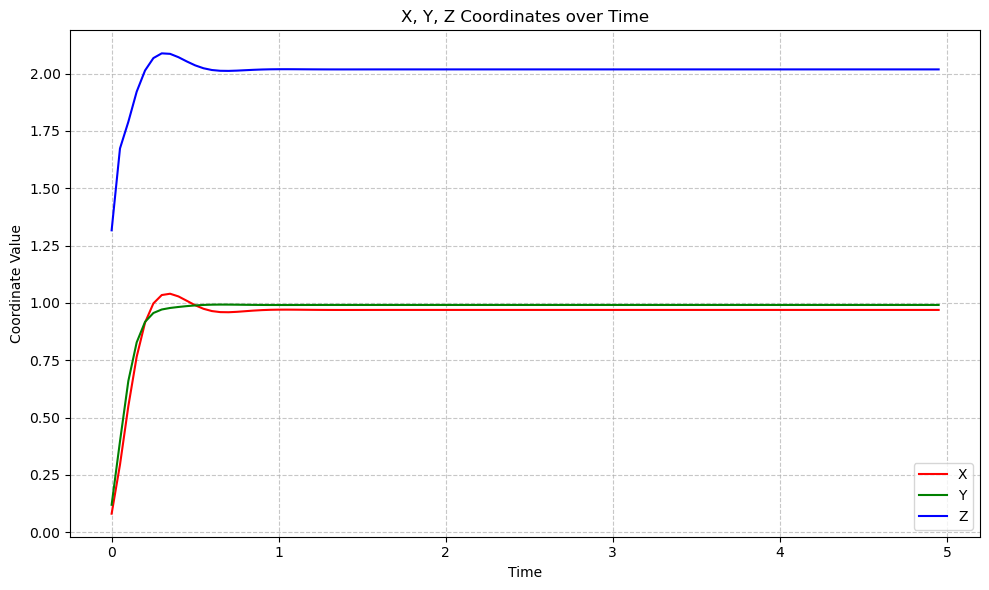

Robot end point is [0.96939859 0.9911199  2.01812505]
Robot end velocity is [ 5.02614243e-13 -1.32689910e-13  3.51678235e-13]


In [24]:
time = np.arange(0, robot.t_f, robot.dt)

# Extract X, Y, Z coordinates
x = [coord[0] for coord in poses]
y = [coord[1] for coord in poses]
z = [coord[2] for coord in poses]

plt.figure(figsize=(10, 6))

# Plot X, Y, and Z coordinates on the same graph
plt.plot(time, x, 'r-', label='X')
plt.plot(time, y, 'g-', label='Y')
plt.plot(time, z, 'b-', label='Z')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Coordinate Value')
plt.title('X, Y, Z Coordinates over Time')

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

print(f'Robot end point is {poses[-1]}')
print(f'Robot end velocity is {vels[-1]}')